# Table of Contents

* [Import packages](#Packages)
* [Import Brain Matrix and Find Number of Pixels in Each Brain](#Pixels_in_brain)
* [Import Sums of Pixels](#Union)
* [Import Two Standard Deviation Whole Brain List](#Two_sd_list)

<a class="anchor" id="Packages"></a>


In [15]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors

# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
#%matplotlib ipympl
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

# Package for FDR correction 
import statsmodels
import scipy.stats as stats# Table of Contents

# Package for fitting normal distribution
from scipy.stats import norm

# Packages for creating instance of merging dictionaries 
import functools
from functools import partial
from functools import reduce

<a class="anchor" id="Pixels_in_brain"></a>
Below we find the number of pixels in each brain so we can normalize each sum by the brain size.

In [2]:
number_pixels_list_whole_brain = []

for file in glob.glob('D:/NEW All AGE Negative masks and roi sums/Whole Brains/*pixel_matrix_with_mask_whole_brain.csv'):
    print(file)
    brain_matrix_without_background = pd.read_csv(file, index_col = 0)
    number_pixels_list_whole_brain.append(len(brain_matrix_without_background[brain_matrix_without_background.sum(axis = 1) != 0]))

D:/NEW All AGE Negative masks and roi sums/Whole Brains\191_a3wt_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\208_5wt_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\209_2wt_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\210_a1tg_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\225_3tg_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\225_4wt_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\225_a1wt_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\225_a2tg_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\226_a1tg_pixel_matrix_with_mask_whole_brain.csv
D:/NEW All AGE Negative masks and roi sums/Whole Brains\226_a2_WT_s2

<a class="anchor" id="Union"></a>
Below we read in all the total sums we saved from the brain segmentations. We also divide each sum by the number of pixels corresponding to that sum.

In [3]:
sums_of_ion_intensities_roi_191_a3wt_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/191_a3wt_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_191_a3wt_whole_brain_df = sums_of_ion_intensities_roi_191_a3wt_whole_brain_df/number_pixels_list_whole_brain[0]
# Change column name
sums_of_ion_intensities_roi_normalized_191_a3wt_whole_brain_df = sums_of_ion_intensities_roi_normalized_191_a3wt_whole_brain_df.rename(columns={"0": "191_a3wt"})
sums_of_ion_intensities_roi_208_5wt_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/208_5wt_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_208_5wt_whole_brain_df = sums_of_ion_intensities_roi_208_5wt_whole_brain_df/number_pixels_list_whole_brain[1]
# Change column name
sums_of_ion_intensities_roi_normalized_208_5wt_whole_brain_df = sums_of_ion_intensities_roi_normalized_208_5wt_whole_brain_df.rename(columns={"0": "208_wt"})
sums_of_ion_intensities_roi_209_2wt_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/209_2wt_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_209_2wt_whole_brain_df = sums_of_ion_intensities_roi_209_2wt_whole_brain_df/number_pixels_list_whole_brain[2]
# Change column name
sums_of_ion_intensities_roi_normalized_209_2wt_whole_brain_df = sums_of_ion_intensities_roi_normalized_209_2wt_whole_brain_df.rename(columns={"0": "209_2wt"})
sums_of_ion_intensities_roi_210_a1tg_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/210_a1tg_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_210_a1tg_whole_brain_df = sums_of_ion_intensities_roi_210_a1tg_whole_brain_df/number_pixels_list_whole_brain[3]
# Change column name
sums_of_ion_intensities_roi_normalized_210_a1tg_whole_brain_df = sums_of_ion_intensities_roi_normalized_210_a1tg_whole_brain_df.rename(columns={"0": "210_a1tg"})
sums_of_ion_intensities_roi_225_3tg_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_3tg_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_3tg_whole_brain_df = sums_of_ion_intensities_roi_225_3tg_whole_brain_df/number_pixels_list_whole_brain[4]
# Change column name
sums_of_ion_intensities_roi_normalized_225_3tg_whole_brain_df = sums_of_ion_intensities_roi_normalized_225_3tg_whole_brain_df.rename(columns={"0": "225_3tg"})
sums_of_ion_intensities_roi_225_4wt_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_4wt_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_4wt_whole_brain_df = sums_of_ion_intensities_roi_225_4wt_whole_brain_df/number_pixels_list_whole_brain[6]
# Change column name
sums_of_ion_intensities_roi_normalized_225_4wt_whole_brain_df = sums_of_ion_intensities_roi_normalized_225_4wt_whole_brain_df.rename(columns={"0": "225_4wt"})
sums_of_ion_intensities_roi_225_a1wt_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_a1wt_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a1wt_whole_brain_df = sums_of_ion_intensities_roi_225_a1wt_whole_brain_df/number_pixels_list_whole_brain[6]
# Change column name
sums_of_ion_intensities_roi_normalized_225_a1wt_whole_brain_df = sums_of_ion_intensities_roi_normalized_225_a1wt_whole_brain_df.rename(columns={"0": "225_a1wt"})
sums_of_ion_intensities_roi_225_a2tg_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_a2tg_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a2tg_whole_brain_df = sums_of_ion_intensities_roi_225_a2tg_whole_brain_df/number_pixels_list_whole_brain[7]
# Change column name
sums_of_ion_intensities_roi_normalized_225_a2tg_whole_brain_df = sums_of_ion_intensities_roi_normalized_225_a2tg_whole_brain_df.rename(columns={"0": "225_a2tg"})
sums_of_ion_intensities_roi_226_a1tg_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/226_a1tg_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a1tg_whole_brain_df = sums_of_ion_intensities_roi_226_a1tg_whole_brain_df/number_pixels_list_whole_brain[8]
# Change column name
sums_of_ion_intensities_roi_normalized_226_a1tg_whole_brain_df = sums_of_ion_intensities_roi_normalized_226_a1tg_whole_brain_df.rename(columns={"0": "226_a1tg"})
sums_of_ion_intensities_roi_226_a2_WT_s2_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/226_a2_WT_s2_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_whole_brain_df = sums_of_ion_intensities_roi_226_a2_WT_s2_whole_brain_df/number_pixels_list_whole_brain[9]
# Change column name
sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_whole_brain_df = sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_whole_brain_df.rename(columns={"0": "226_a2_WT"})
sums_of_ion_intensities_roi_249_4_Tg_s1_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/249_4_Tg_s1_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_249_4_Tg_s1_whole_brain_df/number_pixels_list_whole_brain[10]
# Change column name
sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_whole_brain_df.rename(columns={"0": "249_4_Tg"})
sums_of_ion_intensities_roi_252_8_WT_s1_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/252_8_WT_s1_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_252_8_WT_s1_whole_brain_df = sums_of_ion_intensities_roi_252_8_WT_s1_whole_brain_df/number_pixels_list_whole_brain[11]
# Change column name
sums_of_ion_intensities_roi_normalized_252_8_WT_s1_whole_brain_df = sums_of_ion_intensities_roi_normalized_252_8_WT_s1_whole_brain_df.rename(columns={"0": "252_8_WT"})
sums_of_ion_intensities_roi_256_a3_Tg_s1_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/256_a3_Tg_s1_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_256_a3_Tg_s1_whole_brain_df/number_pixels_list_whole_brain[12]
# Change column name
sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_whole_brain_df.rename(columns={"0": "256_a3_Tg"})
sums_of_ion_intensities_roi_268_3_Tg_s4_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/268_3_Tg_s4_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_whole_brain_df = sums_of_ion_intensities_roi_268_3_Tg_s4_whole_brain_df/number_pixels_list_whole_brain[13]
# Change column name
sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_whole_brain_df = sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_whole_brain_df.rename(columns={"0": "268_3_Tg"})
sums_of_ion_intensities_roi_268_a3_WT_s2_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/268_a3_WT_s2_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_whole_brain_df = sums_of_ion_intensities_roi_268_a3_WT_s2_whole_brain_df/number_pixels_list_whole_brain[14]
# Change column name
sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_whole_brain_df = sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_whole_brain_df.rename(columns={"0": "268_a3_WT"})
sums_of_ion_intensities_roi_270_5_Tg_s4_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/270_5_Tg_s4_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_whole_brain_df = sums_of_ion_intensities_roi_270_5_Tg_s4_whole_brain_df/number_pixels_list_whole_brain[15]
# Change column name
sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_whole_brain_df = sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_whole_brain_df.rename(columns={"0": "270_5_Tg"})
sums_of_ion_intensities_roi_270_a1_Tg_s1_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/270_a1_Tg_s1_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_270_a1_Tg_s1_whole_brain_df/number_pixels_list_whole_brain[16]
# Change column name
sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_whole_brain_df = sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_whole_brain_df.rename(columns={"0": "270_a1_Tg"})
sums_of_ion_intensities_roi_278_a2_WT_s1_whole_brain_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/278_a2_WT_s1_sum_of_ions_within_whole_brain.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_whole_brain_df = sums_of_ion_intensities_roi_278_a2_WT_s1_whole_brain_df/number_pixels_list_whole_brain[17]
# Change column name
sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_whole_brain_df = sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_whole_brain_df.rename(columns={"0": "278_a2_WT"})

<a class="anchor" id="Two_sd_list"></a>
Below we import the two standard deviation list.

In [4]:
significant_anova_ion_whole_brain = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/two_sd_filtered_ions_no_noise.csv')
len(significant_anova_ion_whole_brain)

364

Below we merge the individual groups with each other based on age and genotype and calculate the mean within groups.

In [5]:
# 6mo wt
wt_6mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_225_4wt_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_225_a1wt_whole_brain_df, sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_6mo_only['mean_wt_6mo'] = wt_6mo_only.mean(axis=1)

# 12mo wt
wt_12mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_208_5wt_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_209_2wt_whole_brain_df, sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_12mo_only['mean_wt_12mo'] = wt_12mo_only.mean(axis=1)

# 22mo wt
wt_22mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_191_a3wt_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_252_8_WT_s1_whole_brain_df, sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_22mo_only['mean_wt_22mo'] = wt_22mo_only.mean(axis=1)

# 6mo tg
tg_6mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_225_3tg_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_225_a2tg_whole_brain_df, sums_of_ion_intensities_roi_normalized_226_a1tg_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_6mo_only['mean_tg_6mo'] = tg_6mo_only.mean(axis=1)

# 12mo tg
tg_12mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_210_a1tg_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_whole_brain_df, sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_12mo_only['mean_tg_12mo'] = tg_12mo_only.mean(axis=1)

# 22mo tg
tg_22mo_only = pd.merge(sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_whole_brain_df, pd.merge(sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_whole_brain_df, sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_whole_brain_df, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_22mo_only['mean_tg_22mo'] = tg_22mo_only.mean(axis=1)

Below we merge the same ages together across the genotypes and take the log2 fold change of the means.

In [6]:
merged_6mo = pd.merge(wt_6mo_only, tg_6mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_6mo['log2fc_6mo'] = np.log2(merged_6mo['mean_tg_6mo']/merged_6mo['mean_wt_6mo'])
merged_12mo = pd.merge(wt_12mo_only, tg_12mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_12mo['log2fc_12mo'] = np.log2(merged_12mo['mean_tg_12mo']/merged_6mo['mean_wt_6mo'])
merged_22mo = pd.merge(wt_22mo_only, tg_22mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_22mo['log2fc_22mo'] = np.log2(merged_22mo['mean_tg_22mo']/merged_6mo['mean_wt_6mo'])

C:\Users\Waters\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Below we merge together the dataframes and keep only the two standard deviation list ions.

In [7]:
final_merged_all_fold_changes = pd.merge(merged_6mo['log2fc_6mo'], pd.merge(merged_12mo['log2fc_12mo'], merged_22mo['log2fc_22mo'], left_index = True, right_index = True), left_index = True, right_index = True)
# Keep only 2 sd ions
final_merged_all_fold_changes_filtered_ions = final_merged_all_fold_changes.loc[significant_anova_ion_whole_brain['0'], :]
final_merged_all_fold_changes_filtered_ions

,log2fc_6mo,log2fc_12mo,log2fc_22mo
790.5429,-0.028305,0.340975,-0.146679
700.5101,-0.060998,0.114343,0.563834
331.2639,0.132222,0.091243,-0.162221
283.2645,-0.258797,0.114690,-0.248831
892.6272,-0.728490,-0.747314,0.701589
...,...,...,...
727.5385,-0.108077,0.338829,0.782249
754.5710,-0.240802,0.195931,0.136984
749.4791,0.101090,0.348606,0.366767
725.5073,0.299668,0.446705,0.982166


# Hierarchical clustering

Below we create a dendrogram for the data

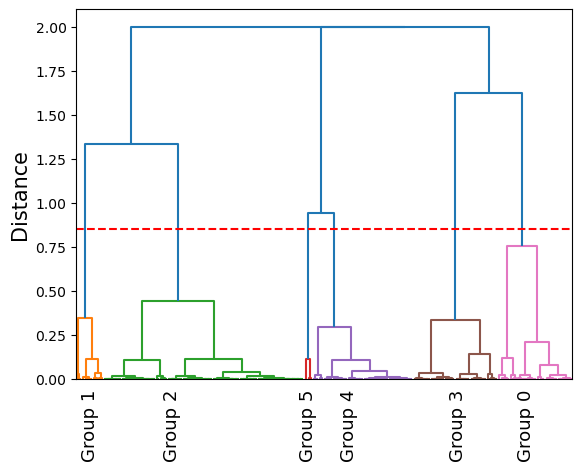

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_data = linkage(final_merged_all_fold_changes_filtered_ions, method='complete', metric='correlation')
dendrogram(linkage_data, color_threshold=0.85)
plt.axhline(y = 0.85, color = 'red', linestyle = '--')
plt.ylabel('Distance', fontsize = 15)
plt.xticks([100, 700, 1700, 2000, 2800, 3300], ['Group 1', 'Group 2', 'Group 5', 'Group 4', 'Group 3', 'Group 0'],
       rotation=90, fontsize = 13)
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_ion_clustering_dendrogram.tiff', bbox_inches = 'tight')
plt.show()

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


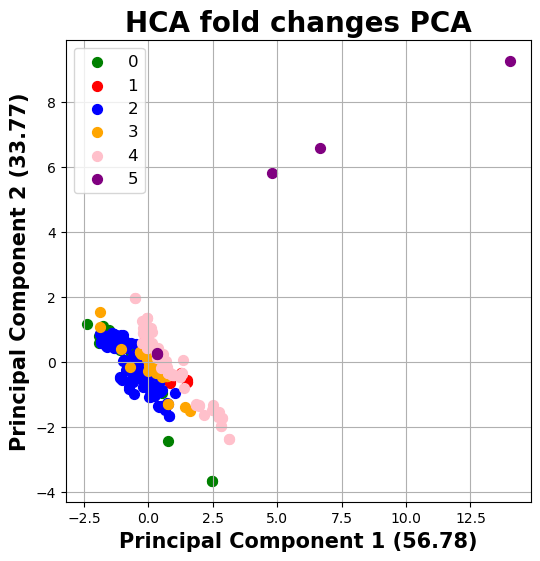

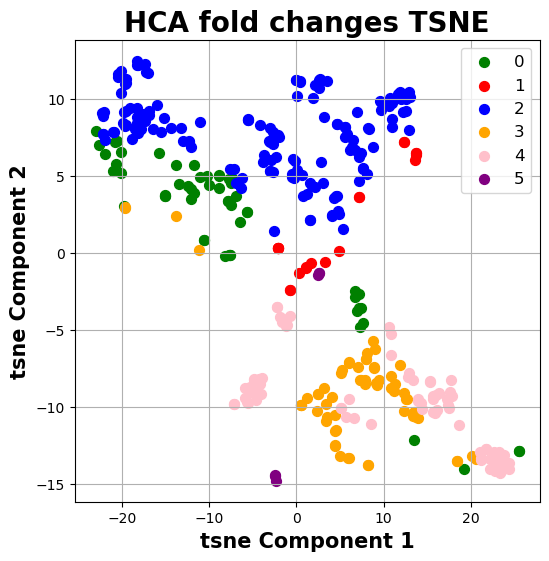

Text(0.5, 1.0, 'HCA fold changes UMAP')

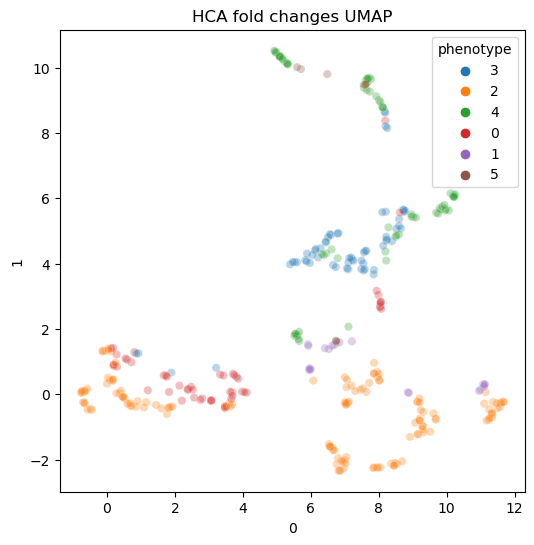

In [11]:
n_clusters_hc = 6
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hc, affinity='correlation', linkage='complete')
labels_hc = hierarchical_cluster.fit_predict(final_merged_all_fold_changes_filtered_ions)

final_merged_all_fold_changes_filtered_ions['labels_hc'] = labels_hc
# Standardize data
final_merged_all_fold_changes_filtered_ions_standardized = StandardScaler().fit_transform(final_merged_all_fold_changes_filtered_ions.drop(columns = ['labels_hc']))

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = labels_hc
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = labels_hc
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = labels_hc
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('HCA fold changes UMAP', fontsize=12)

# DON'T RUN THE BELOW BECAUSE IT ALREADY HAS THE LABELS ADDED FROM ABOVE AND WILL GIVE DIFFERENT RESULTS THAN WHAT IS BELOW IF THE CODE CELL ABOVE IS EXECUTED FIRST

In [11]:
'''n_clusters_hc = 6
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hc, affinity='correlation', linkage='complete')
labels_hc = hierarchical_cluster.fit_predict(final_merged_all_fold_changes_filtered_ions)

final_merged_all_fold_changes_filtered_ions['labels_hc'] = labels_hc
# Standardize data
final_merged_all_fold_changes_filtered_ions_standardized = StandardScaler().fit_transform(final_merged_all_fold_changes_filtered_ions.drop(columns = ['labels_hc']))

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = labels_hc
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.xlim([-2.5, 2.5])
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = labels_hc
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = labels_hc
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('HCA fold changes UMAP', fontsize=12)'''

"n_clusters_hc = 6\nhierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hc, affinity='correlation', linkage='complete')\nlabels_hc = hierarchical_cluster.fit_predict(final_merged_all_fold_changes_filtered_ions)\n\nfinal_merged_all_fold_changes_filtered_ions['labels_hc'] = labels_hc\n# Standardize data\nfinal_merged_all_fold_changes_filtered_ions_standardized = StandardScaler().fit_transform(final_merged_all_fold_changes_filtered_ions.drop(columns = ['labels_hc']))\n\n# Specify plot type\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)\npercent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)\nprincipalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])\nprincipalDf_pca['phenotype'] = labels_hc\nfig = plt.figure(figsize = (6,6))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel(f'Principal Component 1 ({percent_variance[

## Below we look at the clusters by plotting the trends of the logFC over time for each cluster

In [12]:
cluster0 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 0]
cluster1 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 1]
cluster2 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 2]
cluster3 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 3]
cluster4 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 4]
cluster5 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 5]
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster = final_merged_all_fold_changes_filtered_ions.sort_values(by = 'labels_hc')
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster.to_csv('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_ion_clustering_using_logfc_patterns_over_time.csv')
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster

,log2fc_6mo,log2fc_12mo,log2fc_22mo,labels_hc
865.5027,0.210976,0.766427,0.395223,0
865.5038,0.216936,0.755953,0.391807,0
747.5109,0.020162,0.311325,0.427747,0
726.5406,-0.206735,0.532643,0.211342,0
726.4968,0.073454,0.346826,0.299259,0
...,...,...,...,...
299.9460,5.321978,-5.399651,-9.230670,5
336.0777,3.192979,-1.784591,-3.029575,5
798.5365,0.046975,-0.164748,-0.119968,5
798.5366,0.047148,-0.160703,-0.116709,5


Text(0.5, 1.0, 'Group 0')

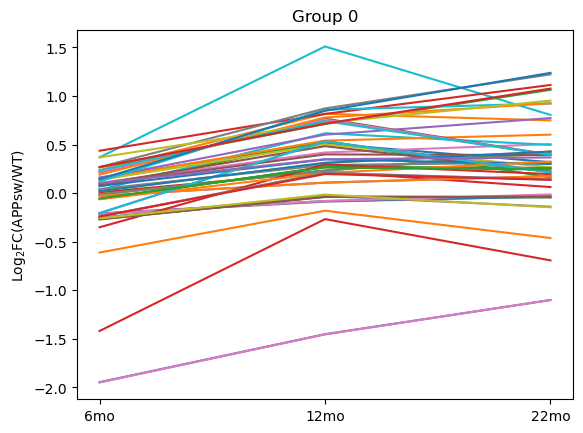

In [13]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 0].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 0')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group0_plot.tiff')

Text(0.5, 1.0, 'Group 1')

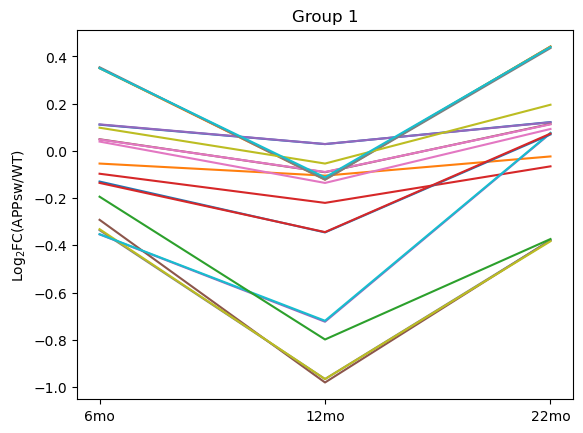

In [14]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 1].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 1')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group1_plot.tiff')

Text(0.5, 1.0, 'Group 2')

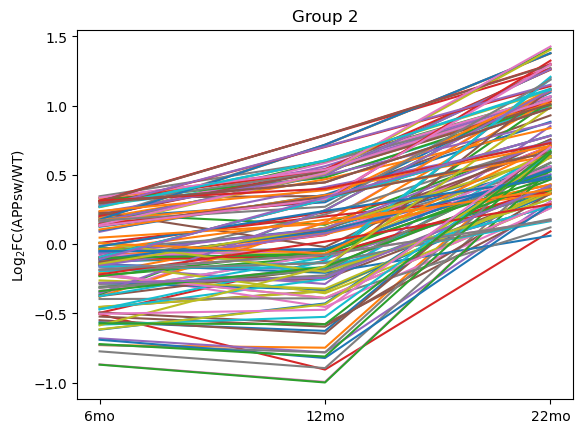

In [15]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 2].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 2')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group2_plot.tiff')

Text(0.5, 1.0, 'Group 3')

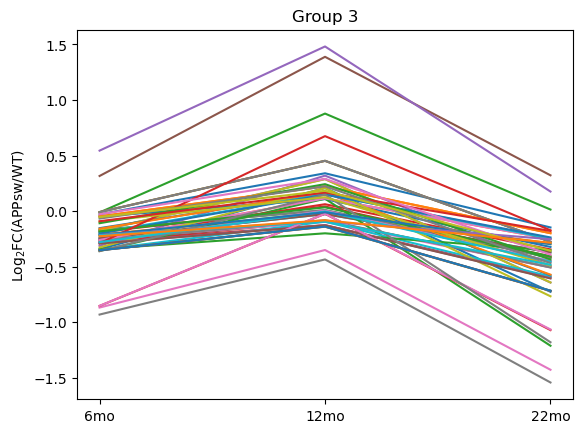

In [16]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 3].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 3')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group3_plot.tiff')

Text(0.5, 1.0, 'Group 4')

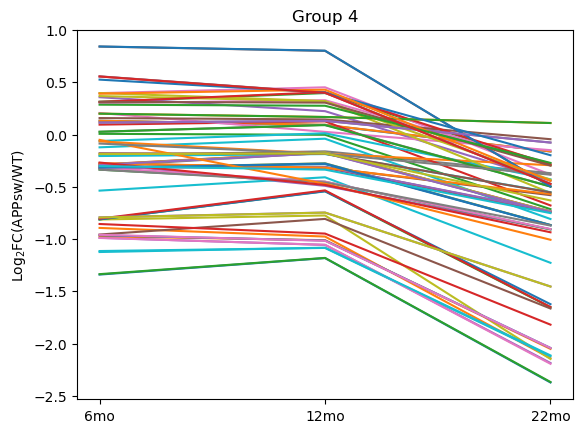

In [17]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 4].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 4')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group4_plot.tiff')

Text(0.5, 1.0, 'Group 5')

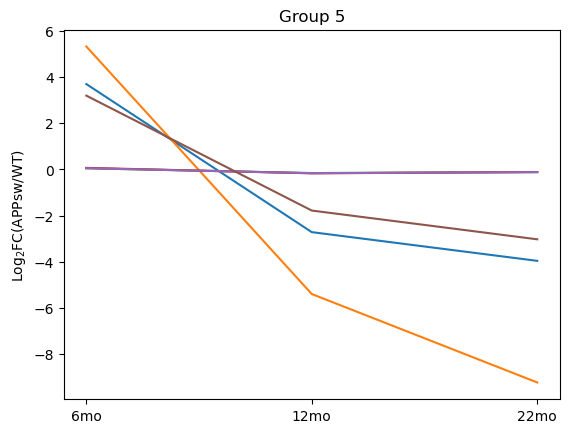

In [18]:
final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 5].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'])
plt.ylabel('Log$_2$FC(APPsw/WT)')
plt.title('Group 5')
#plt.savefig('Images For Paper/negative_whole_brain_ion_clustering_group5_plot.tiff')

# Only significant Ions From Holier Holy List

In [13]:
ions_significant_in_tg = ['776.5504']

clustered_ions_significant_in_tg = final_merged_all_fold_changes_filtered_ions_sorted_by_cluster[final_merged_all_fold_changes_filtered_ions_sorted_by_cluster.index.isin(ions_significant_in_tg)]
clustered_ions_significant_in_tg

,log2fc_6mo,log2fc_12mo,log2fc_22mo,labels_hc
776.5504,-0.251629,-0.030226,-0.140144,0


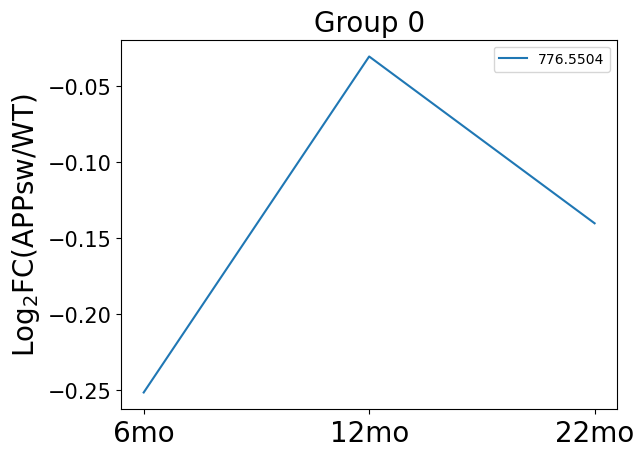

In [20]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 0', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group0_plot.tiff', bbox_inches='tight')

In [99]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 1].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 1', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group1_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

In [100]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 2].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 2', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group2_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

In [101]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 3].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 3', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group3_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

In [102]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 4].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 4', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group4_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

In [103]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 5].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 5', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_ion_clustering_group5_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

Below we make a heatmap of the results.

In [104]:
plt.figure(figsize = (10, 10))

# Add white space between groups
line0 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[-1])
df1 = pd.concat([clustered_ions_significant_in_tg.iloc[:0], line0, clustered_ions_significant_in_tg.iloc[0:]])
line = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[7])
df2 = pd.concat([df1.iloc[:6], line, df1.iloc[6:]])
line2 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[9])
df3 = pd.concat([df2.iloc[:8], line2, df2.iloc[8:]])
line3 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[15])
df4 = pd.concat([df3.iloc[:14], line3, df3.iloc[14:]])
line4 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[20])
df5 = pd.concat([df4.iloc[:19], line4, df4.iloc[19:]])
line5 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[22])
df6 = pd.concat([df5.iloc[:21], line5, df5.iloc[21:]])
# Rename index
df6 = df6.rename(index={-1: 'GROUP 0:', 7: 'GROUP 1:', 9: 'GROUP 2:', 15: 'GROUP 3:', 20: 'GROUP 4:', 22: 'GROUP 5:'})

normalize = mcolors.TwoSlopeNorm(vmin= df6[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = df6[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(df6.drop(columns = 'labels_hc'), cmap = 'bwr', norm = normalize)

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 15)
plt.tick_params(left=False, bottom=False)

#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])


ValueError: vmin, vcenter, and vmax must be in ascending order

<Figure size 1000x1000 with 0 Axes>

ValueError: vmin, vcenter, and vmax must be in ascending order

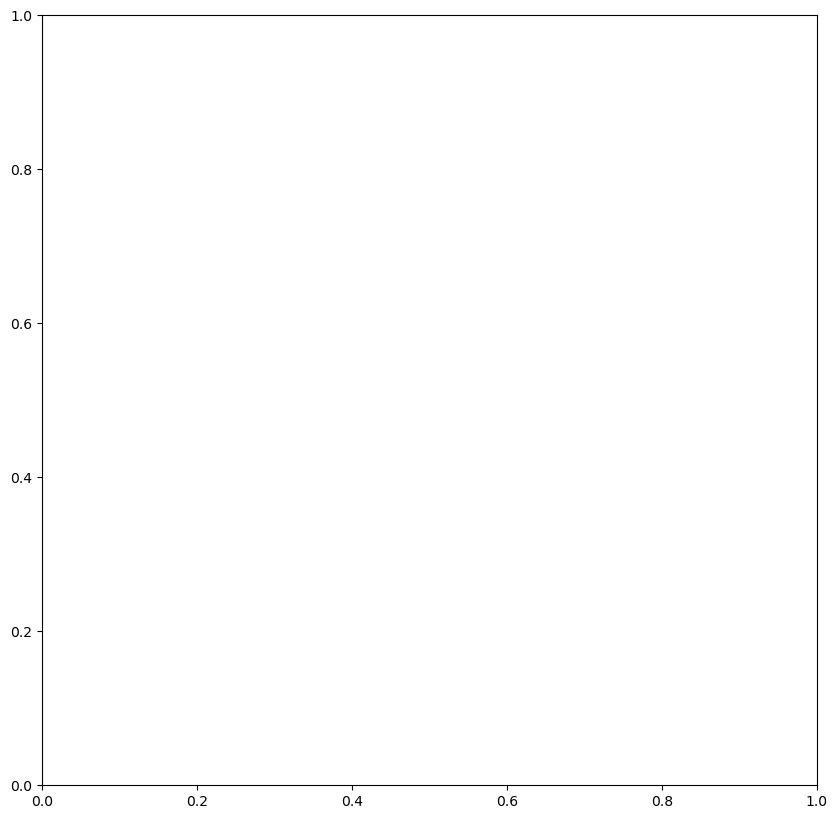

In [105]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Add white space between groups
line0 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[-1])
df1 = pd.concat([clustered_ions_significant_in_tg.iloc[:0], line0, clustered_ions_significant_in_tg.iloc[0:]])


line1 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[7])
df2 = pd.concat([df1.iloc[:6], line1, df1.iloc[6:]])
line2 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[8])
df3 = pd.concat([df2.iloc[:7], line2, df2.iloc[7:]])


line3 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[10])
df4 = pd.concat([df3.iloc[:9], line3, df3.iloc[9:]])
line4 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[11])
df5 = pd.concat([df4.iloc[:10], line4, df4.iloc[10:]])


line5 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[17])
df6 = pd.concat([df5.iloc[:16], line5, df5.iloc[16:]])
line6 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[18])
df7 = pd.concat([df6.iloc[:17], line6, df6.iloc[17:]])

line7 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[23])
df8 = pd.concat([df7.iloc[:22], line7, df7.iloc[22:]])
line8 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[24])
df9 = pd.concat([df8.iloc[:23], line8, df8.iloc[23:]])

line9 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[26])
df10 = pd.concat([df9.iloc[:25], line9, df9.iloc[25:]])
line10 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[27])
df11 = pd.concat([df10.iloc[:26], line10, df10.iloc[26:]])
# Rename index
df11 = df11.rename(index={-1: 'GROUP 0:', 7: '', 8: 'GROUP 1:', 10: '', 11: 'GROUP 2:', 17: '', 18: 'GROUP 3:', 23: '', 24: 'GROUP 4:', 26: '', 27: 'GROUP 5:'})

normalize = mcolors.TwoSlopeNorm(vmin= df11[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = df11[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(df11.drop(columns = 'labels_hc'), cmap = 'bwr', norm = normalize, ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
ax.axes.set_aspect('equal')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap.tiff', bbox_inches='tight')

# Below we make heatmaps for each group with their own scale bars to accentuate the change in each group

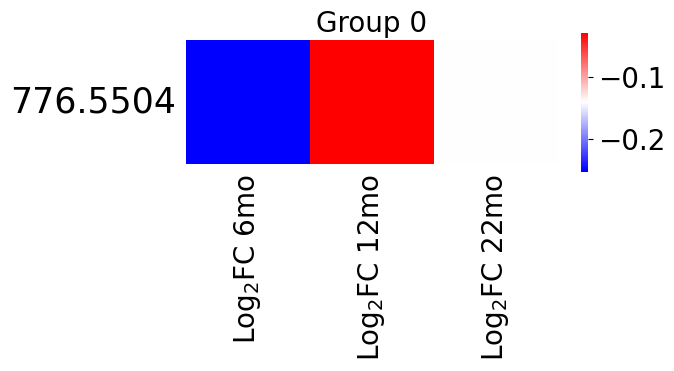

In [13]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 0 dataframe
clustered_ions_significant_in_tg_group0 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group0.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.3})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 0', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group0_only.tiff', bbox_inches='tight')

ValueError: zero-size array to reduction operation fmin which has no identity

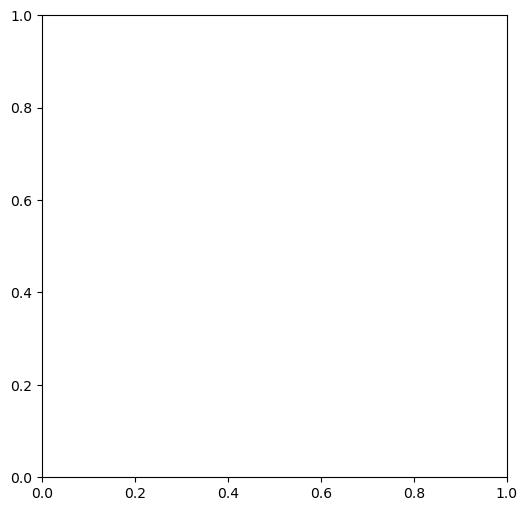

In [107]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 1 dataframe
clustered_ions_significant_in_tg_group1 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 1]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group1.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0)
ax.axes.set_aspect('equal')
plt.title('Group 1')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group1_only.tiff', bbox_inches='tight')

ValueError: zero-size array to reduction operation fmin which has no identity

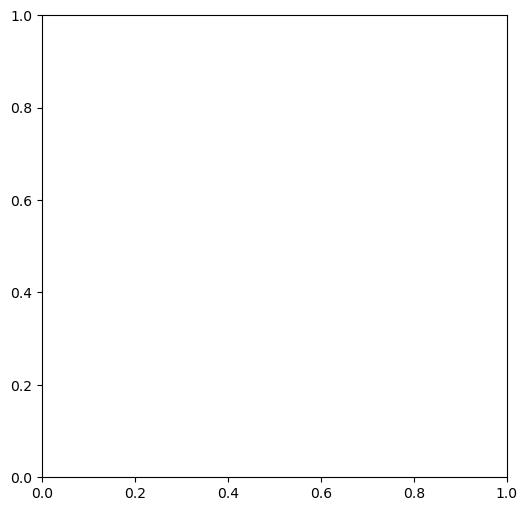

In [108]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group2 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 2]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group2.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0)
ax.axes.set_aspect('equal')
plt.title('Group 2')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group2_only.tiff', bbox_inches='tight')

ValueError: zero-size array to reduction operation fmin which has no identity

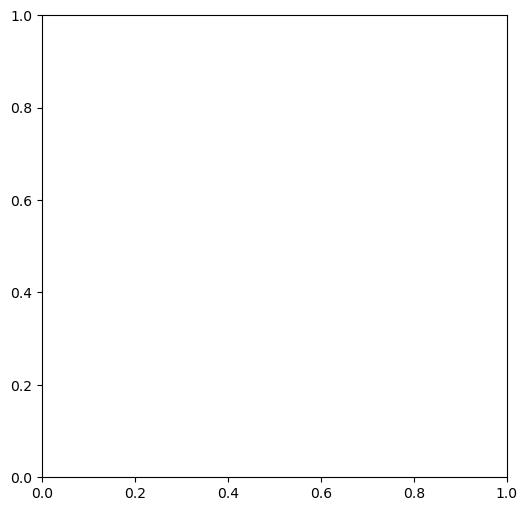

In [109]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 3 dataframe
clustered_ions_significant_in_tg_group3 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 3]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group3[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group3[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group3.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0)
ax.axes.set_aspect('equal')
plt.title('Group 3')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group3_only.tiff', bbox_inches='tight')

ValueError: zero-size array to reduction operation fmin which has no identity

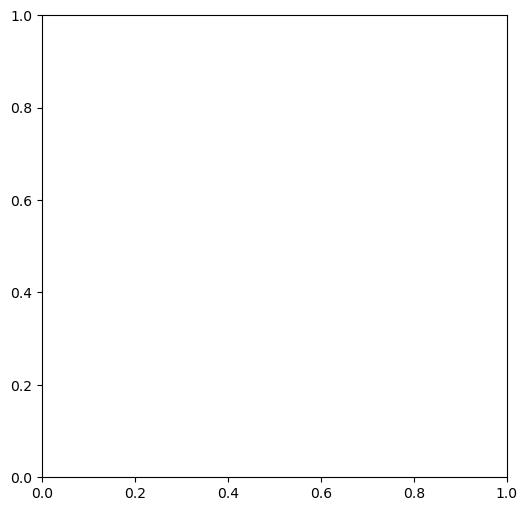

In [110]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 4 dataframe
clustered_ions_significant_in_tg_group4 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 4]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group4.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0)
ax.axes.set_aspect('equal')
plt.title('Group 4')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group4_only.tiff', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group5 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 5]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group5.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0)
ax.axes.set_aspect('equal')
plt.title('Group 5')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group5_only.tiff', bbox_inches='tight')

# Below we look at the log2fc change compared to 6mo WT mice for all groups.

In [14]:
np.mean(clustered_ions_significant_in_tg_group0['log2fc_12mo']-clustered_ions_significant_in_tg_group0['log2fc_6mo'])

0.221403361637605

In [15]:
np.mean(clustered_ions_significant_in_tg_group0['log2fc_22mo']-clustered_ions_significant_in_tg_group0['log2fc_12mo'])

-0.10991893350438277

## Below we save the images without labels

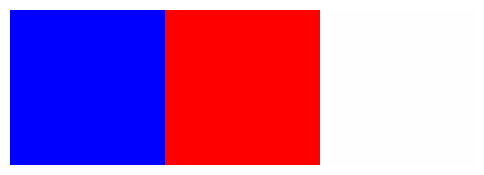

In [14]:
fig = plt.figure(figsize = (6, 6))## Below we save the images without labels
ax = fig.add_subplot(111)

# Make group 0 dataframe
clustered_ions_significant_in_tg_group0 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

sns.heatmap(clustered_ions_significant_in_tg_group0.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative Whole Brain Ion Changes  Over Time Compared to 6mo WT/negative_whole_brain_holy_list_heatmap_group0_only_no_labels.tiff', bbox_inches='tight')